 Convert BGR Image to Grayscale

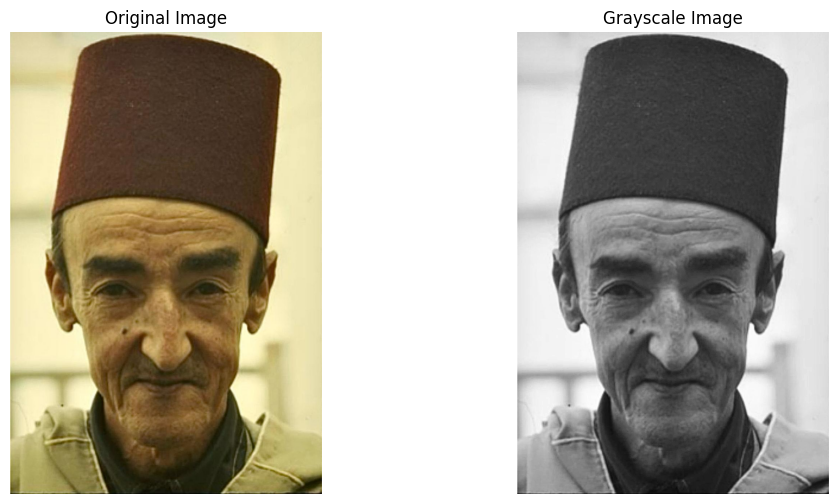

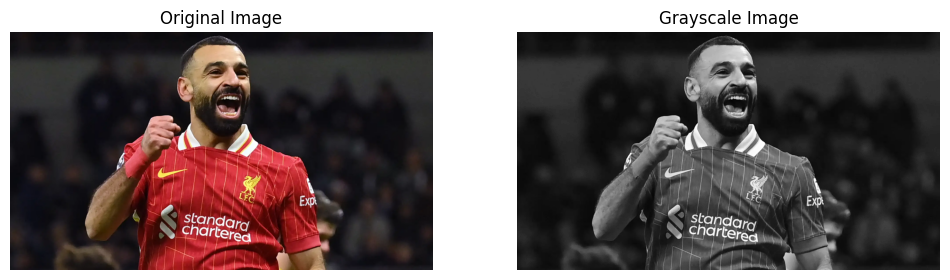

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('new_image.jpeg')  # Read the input image in BGR format
img2= cv2.imread('Mohamed-Salah.jpeg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convert to RGB for display


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Display original vs grayscale
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image'), plt.axis('off')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img_rgb2), plt.title('Original Image'), plt.axis('off')
plt.subplot(122), plt.imshow(gray2, cmap='gray'), plt.title('Grayscale Image'), plt.axis('off')
plt.show()

 Noise Reduction with Median Filter

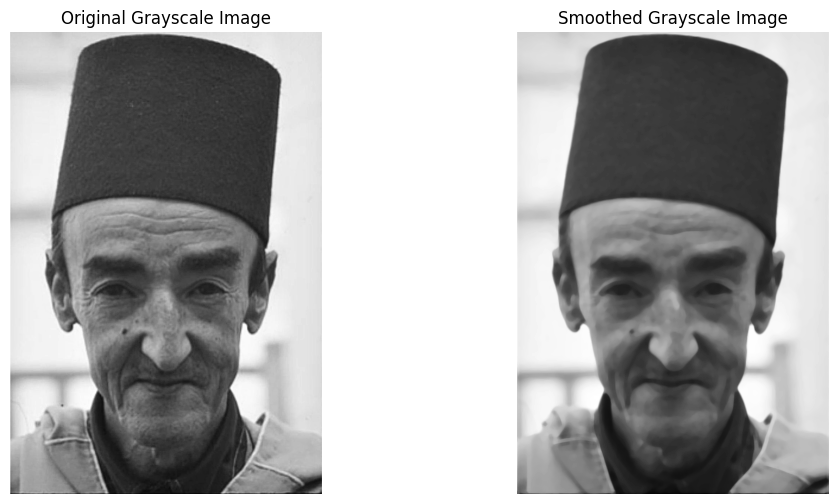

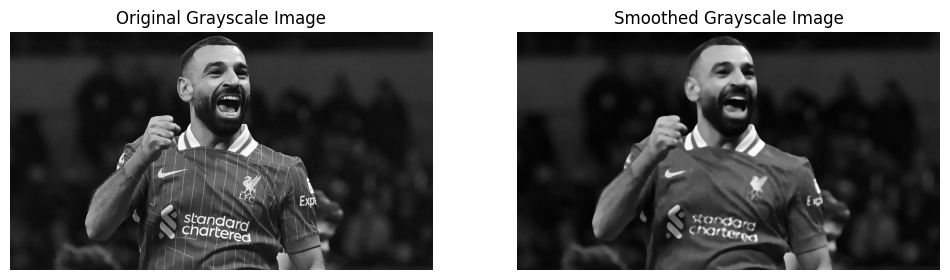

In [2]:
median_blur = cv2.medianBlur(gray, 15) #  (kernel size 15)
median_blur2 = cv2.medianBlur(gray2, 15) #  (kernel size 15)


# Display grayscale vs denoised
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original Grayscale Image'), plt.axis('off')
plt.subplot(122), plt.imshow(median_blur, cmap='gray'), plt.title('Smoothed Grayscale Image'), plt.axis('off')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(gray2, cmap='gray'), plt.title('Original Grayscale Image'), plt.axis('off')
plt.subplot(122), plt.imshow(median_blur2, cmap='gray'), plt.title('Smoothed Grayscale Image'), plt.axis('off')
plt.show()

Kernel size is directly related to noise reduction , bigger size means higher reduction

Laplacian Filter for Edge detection

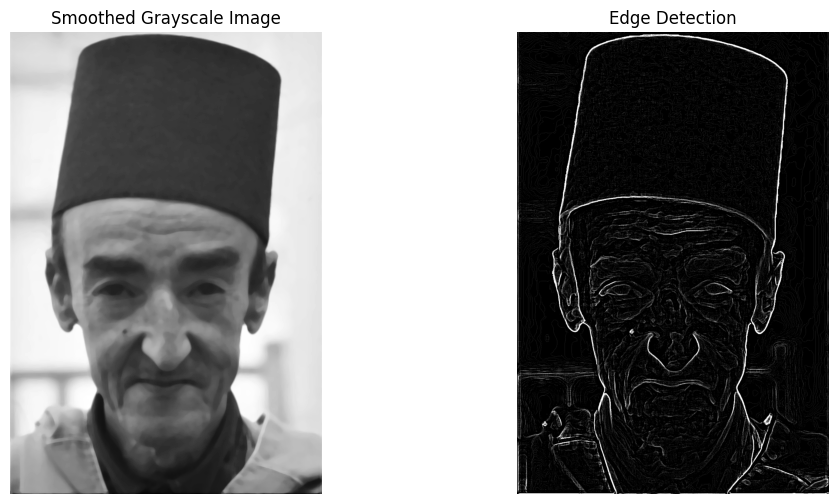

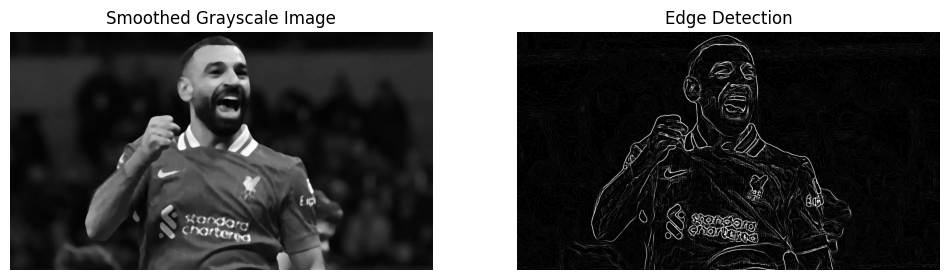

In [3]:
laplacian = cv2.Laplacian(median_blur, cv2.CV_8U, ksize=5)  # Kernel size 5
laplacian2 = cv2.Laplacian(median_blur2, cv2.CV_8U, ksize=5)  # Kernel size 5


# Display enhanced edges before thresholding
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(median_blur, cmap='gray'), plt.title('Smoothed Grayscale Image'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian, cmap='gray'), plt.title('Edge Detection'), plt.axis('off')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(median_blur2, cmap='gray'), plt.title('Smoothed Grayscale Image'), plt.axis('off')
plt.subplot(122), plt.imshow(laplacian2, cmap='gray'), plt.title('Edge Detection'), plt.axis('off')
plt.show()

After threshholding

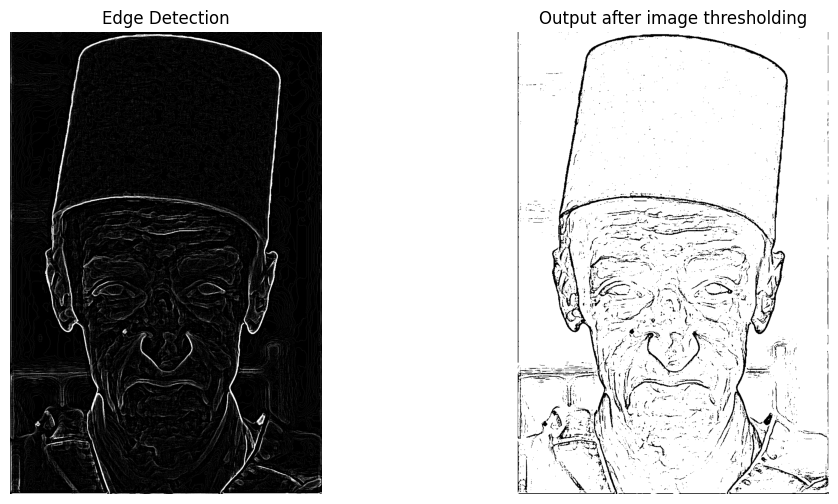

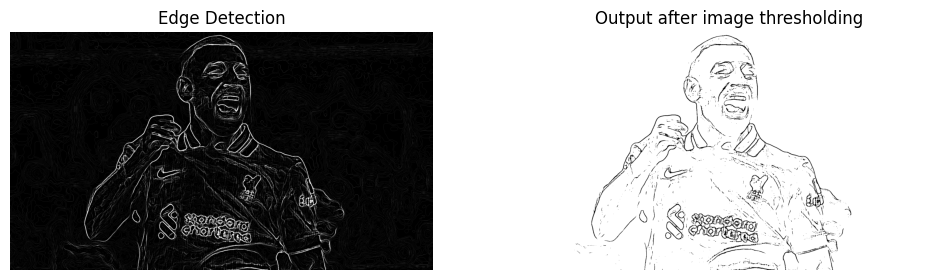

In [8]:
# Apply binary thresholding (invert to get white edges)
_, sketch = cv2.threshold(laplacian, 40, 255, cv2.THRESH_BINARY_INV)
_, sketch2 = cv2.threshold(laplacian2, 100, 255, cv2.THRESH_BINARY_INV)



# Display final sketch (post-thresholding)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(laplacian, cmap='gray'), plt.title('Edge Detection'), plt.axis('off')
plt.subplot(122), plt.imshow(sketch, cmap='gray'), plt.title('Output after image thresholding'), plt.axis('off')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(laplacian2, cmap='gray'), plt.title('Edge Detection'), plt.axis('off')
plt.subplot(122), plt.imshow(sketch2, cmap='gray'), plt.title('Output after image thresholding'), plt.axis('off')
plt.show()

Generate painting image

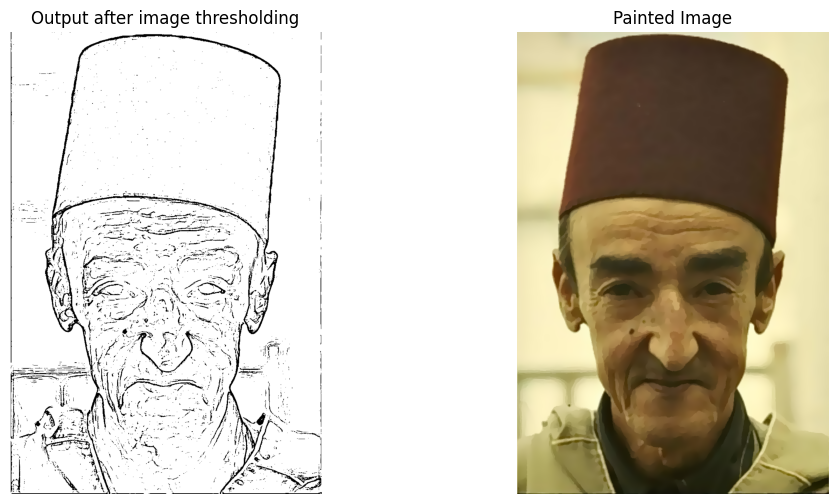

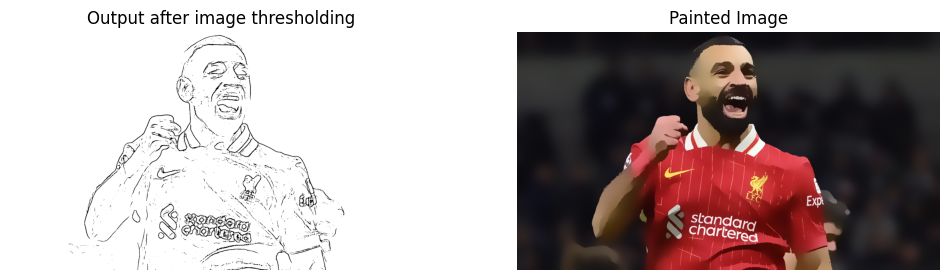

In [29]:
image = cv2.imread('new_image.jpeg')
image2 = cv2.imread('Mohamed-Salah.jpeg')

filtered_image = image.copy()
filtered_image2 = image2.copy()

for _ in range(5):  # Apply the filter multiple times
    filtered_image = cv2.bilateralFilter(filtered_image, d=15, sigmaColor=15, sigmaSpace=10)

for _ in range(5):  # Apply the filter multiple times
    filtered_image2 = cv2.bilateralFilter(filtered_image2, d=45, sigmaColor=45, sigmaSpace=20)

# Convert BGR to RGB for correct display
filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)
filtered_image2 = cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB)


# Display final sketch (post-thresholding)
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(sketch, cmap='gray'), plt.title('Output after image thresholding'), plt.axis('off')
plt.subplot(122), plt.imshow(filtered_image, cmap='gray'), plt.title('Painted Image'), plt.axis('off')
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(sketch2, cmap='gray'), plt.title('Output after image thresholding'), plt.axis('off')
plt.subplot(122), plt.imshow(filtered_image2, cmap='gray'), plt.title('Painted Image'), plt.axis('off')
plt.show()

Overlaying edge mask on painted image to get cartoon image

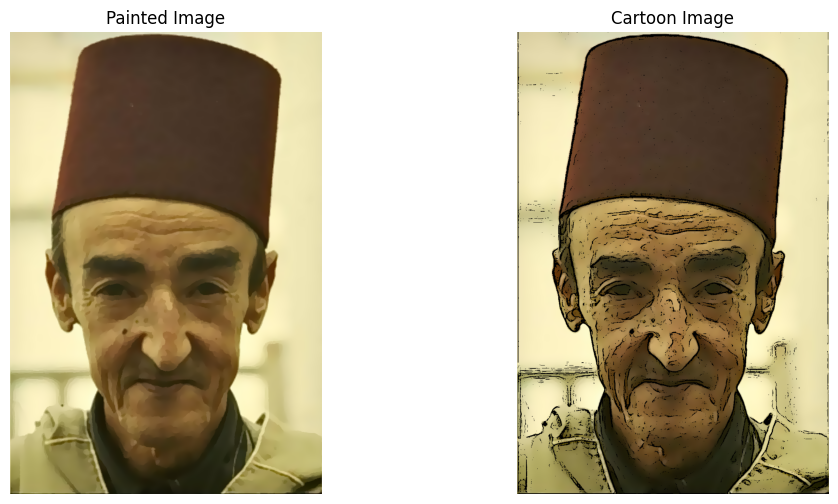

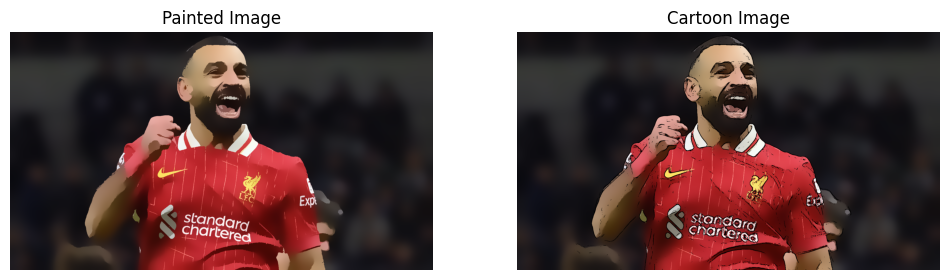

In [ ]:
# Combine the edge mask with the filtered image using bitwise AND
cartoon = cv2.bitwise_and(sketch, filtered_image)
cartoon2 = cv2.bitwise_and(sketch2, filtered_image2)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(filtered_image, cmap='gray'), plt.title('Painted Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cartoon, cmap='gray'), plt.title('Cartoon Image'), plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(filtered_image2, cmap='gray'), plt.title('Painted Image'), plt.axis('off')
plt.subplot(122), plt.imshow(cartoon2, cmap='gray'), plt.title('Cartoon Image'), plt.axis('off')
plt.show()
